# Usage (datasets)
Here, we will review the raw/cleaned datasets. `Scenario` class performs data cleaning internally using `JHUData` class and so on, but it is important to review the features and data types before analysing them.

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
from pprint import pprint

In [4]:
import covsirphy as cs
cs.__version__

'2.12.0-rho.new.339.357.359.362.366.367.383.fix.360.373'

## Dataset preparation
Download the datasets to "input" directory and load them.

If "input" directory has the datasets, `DataLoader` instance will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically and download the datasets to "input" directory and load them.

In [5]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu()
# Linelist of case reports
linelist = data_loader.linelist()
# Population in each country
population_data = data_loader.population()
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt()

### The number of cases (JHU style)
The main dataset is that of the number of cases and was saved as `jhu_data`, an instance of `JHUData` class. This includes "Confirmed", "Infected", "Recovered" and "Fatal". "Infected" was calculated as "Confirmed - Recovered - Fatal".

In [6]:
type(jhu_data)

covsirphy.cleaning.jhu_data.JHUData

The dataset will be retrieved from [COVID-19 Data Hub](https://covid19datahub.io/) and [Data folder of CovsirPhy project](https://github.com/lisphilar/covid19-sir/tree/master/data). Description of these projects will be shown as follows.

In [7]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [8]:
# Detailed citation list of COVID-19 Data Hub
# print(data_loader.covid19dh_citation)

In [9]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
348838,2020-12-02,930.0,902,12,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,60.19
348839,2020-12-03,931.0,910,12,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,60.19
348840,2020-12-04,931.0,912,12,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,60.19
348841,2020-12-05,933.0,913,12,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,60.19
348842,2020-12-06,933.0,913,12,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,60.19


In [10]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
12966,2020-12-02,Japan,-,150386,20910,2172,127304
12967,2020-12-03,Japan,-,152827,21373,2213,129241
12968,2020-12-04,Japan,-,155232,21816,2240,131176
12969,2020-12-05,Japan,-,157674,21948,2283,133443
12970,2020-12-06,Japan,-,160098,22506,2315,135277


In [11]:
jhu_data.cleaned().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345446 entries, 0 to 12970
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       345446 non-null  datetime64[ns]
 1   Country    345446 non-null  object        
 2   Province   345446 non-null  object        
 3   Confirmed  345446 non-null  int64         
 4   Infected   345446 non-null  int64         
 5   Fatal      345446 non-null  int64         
 6   Recovered  345446 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 21.1+ MB


Total number of cases in all countries with `JHUData.total()` method.

In [12]:
# Calculate total values
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-12-02,64578165,21657892,1495390,41424883,0.023156,0.641469,0.034841
2020-12-03,65263732,21900386,1507635,41855711,0.023101,0.641332,0.034767
2020-12-04,65935673,22166207,1519351,42250115,0.023043,0.640778,0.034713
2020-12-05,66556259,22361738,1528898,42665623,0.022972,0.641046,0.034595
2020-12-06,66567900,22369894,1529000,42669006,0.022969,0.640985,0.034594


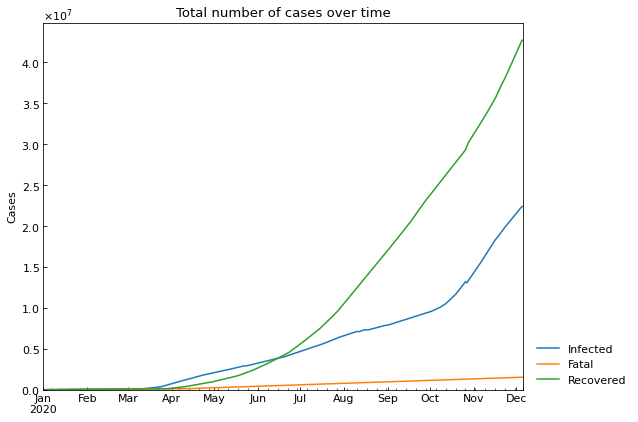

In [13]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

In [14]:
# Statistics of rate values in all countries
total_df.loc[:, total_df.columns.str.contains("per")].describe().T

,count,mean,std,min,25%,50%,75%,max
Fatal per Confirmed,340.0,0.039509,0.017394,0.000000,0.026947,0.034553,0.051113,0.074248
Recovered per Confirmed,340.0,0.419504,0.252854,0.001291,0.198070,0.495618,0.646740,1.000000
Fatal per (Fatal or Recovered),340.0,0.213311,0.274885,0.000000,0.043025,0.089423,0.229566,0.943005


We can create a subset for a country using `JHUData.subset()` method.

In [15]:
# Subset for a country
df, _ = jhu_data.records("Japan")
df.tail()
# We can use ISO3 code etc.
# df, _ = jhu_data.records("JPN")
# df.tail()

,Date,Confirmed,Infected,Fatal,Recovered
300,2020-12-02,150386,20910,2172,127304
301,2020-12-03,152827,21373,2213,129241
302,2020-12-04,155232,21816,2240,131176
303,2020-12-05,157674,21948,2283,133443
304,2020-12-06,160098,22506,2315,135277


Province ("prefecture" for Japan) name can be specified.

In [16]:
df, _ = jhu_data.records("Japan", province="Tokyo")
df.tail()

,Date,Confirmed,Infected,Fatal,Recovered
258,2020-12-01,41311,3937,494,36880
259,2020-12-02,41811,3964,499,37348
260,2020-12-03,42344,4174,501,37669
261,2020-12-04,42793,4240,509,38044
262,2020-12-05,43377,4483,511,38383


In [17]:
# Countries we can select
pprint(jhu_data.countries(), compact=True)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
 'Costa Atlantica', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Grand Princess',
 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
 'Haiti', 'Holy See', 'Honduras', 'Hungary', 

### Linelist of case reports
The number of cases is important, but linelist of case reports will helpful to understand the situation deeply. Linelist data was saved as `linelist`, an instance of `LinelistData` class. This dataset is from [Open COVID-19 Data Working Group](https://github.com/beoutbreakprepared/nCoV2019).

In [18]:
type(linelist)

covsirphy.cleaning.linelist.LinelistData

In [19]:
# Citation
print(linelist.citation)

Xu, B., Gutierrez, B., Mekaru, S. et al. Epidemiological data from the COVID-19 outbreak, real-time case information. Sci Data 7, 106 (2020). https://doi.org/10.1038/s41597-020-0448-0


In [20]:
# Raw dataset
linelist.raw.tail()

,age,sex,province,country,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,chronic_disease,outcome,date_death_or_discharge
2676307,52,female,Lima,Peru,NaN,NaN,17.05.2020,NaN,NaN,NaN,NaN
2676308,52,female,Lima,Peru,NaN,NaN,17.05.2020,NaN,NaN,NaN,NaN
2676309,52,male,Callao,Peru,NaN,NaN,17.05.2020,NaN,NaN,NaN,NaN
2676310,52,male,Lima,Peru,NaN,NaN,17.05.2020,NaN,NaN,NaN,NaN
2676311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Cleaned dataset
linelist.cleaned().tail()

,Country,Province,Hospitalized_date,Confirmation_date,Outcome_date,Confirmed,Infected,Recovered,Fatal,Symptoms,Chronic_disease,Age,Sex
2676306,Peru,Coronel Portillo,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,female
2676307,Peru,Lima,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,female
2676308,Peru,Lima,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,female
2676309,Peru,Callao,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,male
2676310,Peru,Lima,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,male


In [22]:
# Subset for specified area
linelist.subset("Japan", province="Tokyo").tail()

,Hospitalized_date,Confirmation_date,Outcome_date,Confirmed,Infected,Recovered,Fatal,Symptoms,Chronic_disease,Age,Sex
107,NaT,2020-01-30,NaT,True,False,False,False,NaN,NaN,NaN,female
108,NaT,2020-01-24,NaT,True,False,True,False,fever:pneumonia:sore throat,NaN,40.0,male
109,2020-10-01,2020-01-15,2020-01-15,True,False,True,False,cough:fever:sore throat,NaN,30.0,male
110,NaT,2020-01-25,NaT,True,False,False,False,cough:fever,NaN,NaN,female
111,NaT,2020-01-26,NaT,True,False,False,False,fever:joint pain:pneumonia,NaN,40.0,male


In [23]:
# Subset for outcome ("Recovered" or "Fatal")
linelist.closed(outcome="Recovered").tail()

,Country,Province,Hospitalized_date,Confirmation_date,Recovered_date,Symptoms,Chronic_disease,Age,Sex
272,Singapore,-,2020-02-02,2020-02-06,2020-02-17,NaN,NaN,39.0,female
273,Malaysia,Johor,NaT,2020-01-25,2020-02-08,cough:fever,NaN,40.0,male
274,China,Gansu,2020-07-02,2020-02-08,2020-02-17,diarrhea,NaN,1.0,female
275,Canada,Ontario,NaT,2020-01-25,2020-01-31,NaN,hypertension,NaN,male
276,Canada,Ontario,NaT,2020-01-31,2020-02-19,NaN,NaN,NaN,female


As the median value of the period from confirmation to recovery, we can calculate recovery period.

In [24]:
# Recovery period (integer) [days]
linelist.recovery_period()

12

### Population in each country
Population values are necessary to calculate the number of susceptible people. Susceptible is a variable of SIR-derived models. This dataset was saved as `population_data`, an instance of `PopulationData` class.

In [25]:
type(population_data)

covsirphy.cleaning.population.PopulationData

In [26]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [27]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
348838,2020-12-02,930.0,902,12,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,60.19
348839,2020-12-03,931.0,910,12,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,60.19
348840,2020-12-04,931.0,912,12,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,60.19
348841,2020-12-05,933.0,913,12,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,60.19
348842,2020-12-06,933.0,913,12,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,60.19


In [28]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
293596,COL,Colombia,Vichada,2020-12-02,107808
293597,COL,Colombia,Vichada,2020-12-03,107808
293598,COL,Colombia,Vichada,2020-12-04,107808
293599,COL,Colombia,Vichada,2020-12-05,107808
293600,COL,Colombia,Vichada,2020-12-06,107808


We will get the population values with `PopulationData.value()`.

In [29]:
# In a country
population_data.value("Japan", province=None)
# In a country with ISO3 code
# population_data.value("JPN", province=None)
# In a province (prefecture)
# population_data.value("Japan", province="Tokyo")

126529100

We can update the population values.

In [30]:
# Before
population_before = population_data.value("Japan", province="Tokyo")
print(f"Before: {population_before}")
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_after = population_data.value("Japan", province="Tokyo")
print(f" After: {population_after}")

Before: 13942856


 After: 14002973


### Government Response Tracker (OxCGRT)
Government responses are tracked with [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker). Because government responses and activities of persons change the parameter values of SIR-derived models, this dataset is significant when we try to forcast the number of cases.  
With `DataLoader` class, the dataset was retrieved via [COVID-19 Data Hub](https://covid19datahub.io/) and saved as `oxcgrt_data`, an instance of `OxCGRTData` class.

In [31]:
type(oxcgrt_data)

covsirphy.cleaning.oxcgrt.OxCGRTData

In [32]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [33]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
348838,2020-12-02,930.0,902,12,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,60.19
348839,2020-12-03,931.0,910,12,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,60.19
348840,2020-12-04,931.0,912,12,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,60.19
348841,2020-12-05,933.0,913,12,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,60.19
348842,2020-12-06,933.0,913,12,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,60.19


In [34]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
348838,2020-12-02,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,60.19
348839,2020-12-03,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,60.19
348840,2020-12-04,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,60.19
348841,2020-12-05,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,60.19
348842,2020-12-06,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,60.19


In [35]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()
# We can use ISO3 codes
# oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
336,2020-12-02,1,1,1,0,0,1,1,3,2,3,2,40.74
337,2020-12-03,1,1,1,0,0,1,1,3,2,3,2,40.74
338,2020-12-04,1,1,1,0,0,1,1,3,2,3,2,40.74
339,2020-12-05,1,1,1,0,0,1,1,3,2,3,2,40.74
340,2020-12-06,1,1,1,0,0,1,1,3,2,3,2,40.74
